In [2]:
from scripts.data_processing import load_data
from scripts.user_analysis import aggregate_user_behavior
from scripts.exploratory_analysis import (
    compute_basic_metrics,
    segment_users_by_decile,
    compute_correlation_matrix,
    perform_pca,
    plot_histograms,
    plot_pca_result
)
from scripts.db import retrieve_data_as_dataframe

In [3]:
# Load the dataset from database
data = retrieve_data_as_dataframe()

In [4]:
# Compute basic metrics
basic_metrics = compute_basic_metrics(data)
print("Basic Metrics:\n")
basic_metrics

Basic Metrics:



,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [5]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
# Aggregate user behavior
user_behavior = aggregate_user_behavior(data)

In [7]:
# Compute basic metrics
basic_metrics = compute_basic_metrics(user_behavior)
print("Basic Metrics:\n")
basic_metrics

Basic Metrics:



,IMSI,xDR_sessions,total_duration,total_download,total_upload,total_data_volume
count,1.072650e+05,107265.000000,1.072650e+05,1.072650e+05,1.072650e+05,1.072650e+05
mean,2.082016e+14,1.389092,1.459355e+05,6.333706e+08,5.728499e+07,6.906556e+08
std,2.534986e+10,0.809545,1.863518e+05,4.643722e+08,3.564266e+07,4.908637e+08
min,2.040471e+14,0.000000,7.142000e+03,8.827082e+06,2.866892e+06,3.324901e+07
25%,2.082010e+14,1.000000,7.041100e+04,3.148031e+08,3.639251e+07,3.584885e+08
50%,2.082015e+14,1.000000,1.024500e+05,5.700628e+08,4.678050e+07,6.176283e+08
75%,2.082018e+14,2.000000,1.727990e+05,8.070673e+08,6.565842e+07,8.571685e+08
max,2.140743e+14,18.000000,1.855375e+07,8.156743e+09,7.295774e+08,8.846226e+09


In [8]:
# Segment users into deciles
decile_data = segment_users_by_decile(user_behavior)
print("Decile Data:\n", decile_data)

Decile Data:
    decile  total_data_volume   avg_duration
0       0       5.457884e+12   20006.301575
1       1       6.105181e+12   39927.679098
2       2       6.554138e+12   70535.882446
3       3       6.177730e+12   86356.305066
4       4       5.070381e+12   94138.311270
5       5       6.452409e+12  117085.199981
6       6       6.176211e+12  147505.875734
7       7       7.843097e+12  174771.685158
8       8       9.330793e+12  232421.932221
9       9       1.491535e+13  477782.887480


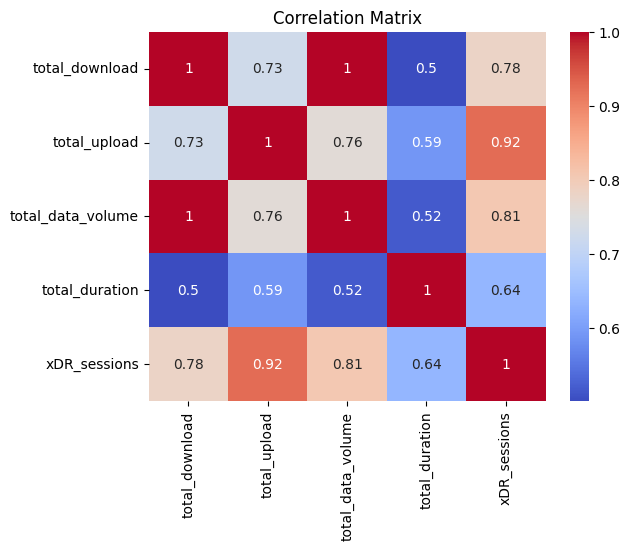

,total_download,total_upload,total_data_volume,total_duration,xDR_sessions
total_download,1.000000,0.726077,0.998753,0.500967,0.781335
total_upload,0.726077,1.000000,0.759503,0.590150,0.924575
total_data_volume,0.998753,0.759503,1.000000,0.516782,0.806302
total_duration,0.500967,0.590150,0.516782,1.000000,0.636451
xDR_sessions,0.781335,0.924575,0.806302,0.636451,1.000000


In [9]:
# Correlation analysis
columns_to_analyze = [
    'total_download', 'total_upload', 'total_data_volume',
    'total_duration', 'xDR_sessions'
]
compute_correlation_matrix(user_behavior, columns_to_analyze)

In [10]:
# Perform PCA
columns_for_pca = ['total_download', 'total_upload', 'total_data_volume']
principal_components, explained_variance = perform_pca(user_behavior, columns_for_pca)

In [11]:
print("Explained Variance Ratio:\n", explained_variance)

Explained Variance Ratio:
 [0.99814294 0.00185706]


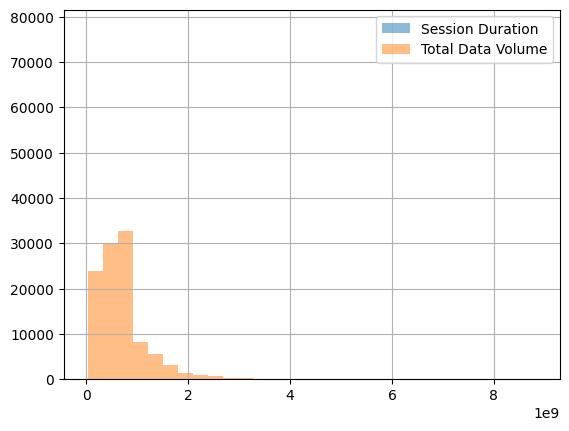

In [12]:
# Graphical Uni variate Analysis
plot_histograms(user_behavior)

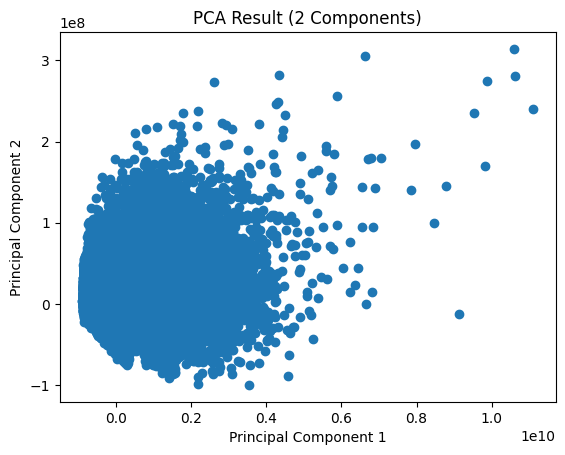

In [13]:
# Graphical bi variate Analysis
plot_pca_result(principal_components)